This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [2]:
import pandas as pd

data = pd.read_csv('data_000637.txt', sep=",",nrows = 20000)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
19995,1,0,27,3869200366,2513,29
19996,1,0,63,3869200366,2517,6
19997,1,0,32,3869200366,2519,5
19998,1,0,17,3869200366,2522,21


In [9]:
#sorting the table based on TDC_CHANNEL
data.sort_values(by="FPGA", ascending=False)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,NS_PASSED
3951,1,1,4,3869200206,1634,16,3.456392e+06
16562,1,1,18,3869200332,1275,5,1.467401e+07
4904,1,1,16,3869200216,2382,19,4.366094e+06
16564,1,1,139,3869200332,1290,0,1.467438e+07
4902,1,1,18,3869200216,2377,18,4.365968e+06
...,...,...,...,...,...,...,...
7846,1,0,53,3869200245,1727,5,6.933608e+06
7847,1,0,57,3869200245,1732,17,6.933742e+06
7849,1,0,64,3869200245,1725,2,6.933555e+06
7850,1,0,51,3869200245,1738,23,6.933898e+06


2\. Estimate the number of BX in a ORBIT (the value 'x').

In [3]:
n_bx = max(data["BX_COUNTER"])+1
print("Number of BX:", n_bx)


Number of BX: 3564


3\. Find out the duration of the data taking in hours, minutes and seconds. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading the whole dataset.

In [10]:
import datetime as dt
#initial time
init_time = dt.datetime.now()
print('Time Begin = \n', init_time)

# now we can assign new column with the total time used in nanosecond for each row
data['NS_TIME'] = data.apply(lambda row : (row.ORBIT_CNT) + (row.BX_COUNTER*25) + ((row.TDC_MEAS*(25/30))), axis= 1)
data

#Ending_time 
end_time = dt.datetime.now()
print('Time End = \n', end_time)

#Process time 
duration = end_time - init_time
print('Time Taken = \n', duration)

Time Begin = 
 2021-12-03 21:01:56.678989
Time End = 
 2021-12-03 21:01:57.771847
Time Taken = 
 0:00:01.092858


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition.

In [5]:
initial_ns = (min(data["ORBIT_CNT"])*n_bx + min(bx_with_min_orbit["BX_COUNTER"])) * 25 + min(tdc_with_min_bx["TDC_MEAS"]) * 25/30                                                                                                 
data['NS_PASSED'] = ((data['ORBIT_CNT']*n_bx + data['BX_COUNTER']) * 25 + data['TDC_MEAS']*25/30) - initial_ns
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,NS_PASSED
0,1,0,123,3869200167,2374,26,0.000000e+00
1,1,0,124,3869200167,2374,27,8.125000e-01
2,1,0,63,3869200167,2553,28,4.476625e+03
3,1,0,64,3869200167,2558,19,4.594125e+03
4,1,0,64,3869200167,2760,25,9.649125e+03
...,...,...,...,...,...,...,...
19995,1,0,27,3869200366,2513,29,1.773438e+07
19996,1,0,63,3869200366,2517,6,1.773446e+07
19997,1,0,32,3869200366,2519,5,1.773451e+07
19998,1,0,17,3869200366,2522,21,1.773460e+07


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [11]:
datagroup = data.groupby('TDC_CHANNEL').sum()
print('Datagroup sort by TDC Channels counts = \n', datagroup, '\n')
datagroupsort = datagroup.sort_values(by="TDC_CHANNEL", ascending=False)
print ('Top 3 of the most noisy channels are = \n',datagroupsort.head(3))


Datagroup sort by TDC Channels counts = 
              HEAD  FPGA      ORBIT_CNT  BX_COUNTER  TDC_MEAS     NS_PASSED  \
TDC_CHANNEL                                                                  
1             448   435  1733401718409      864488      6431  3.879155e+09   
2             502   479  1942338533552      959766      7390  4.424070e+09   
3             379   362  1466426900120      653577      5448  3.275128e+09   
4             415   393  1605718110639      739829      6185  3.676721e+09   
5             275   246  1064030073147      481102      4202  2.421184e+09   
...           ...   ...            ...         ...       ...           ...   
125             7     7    27084401996        9974       119  7.351955e+07   
126             9     9    34822802655        9430       166  1.023447e+08   
127            21    21    81253205596       35531       367  1.857717e+08   
128            25    25    96730006785       39179       316  2.320464e+08   
139          1693   52

6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit). Count also the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [7]:
non_empty_orbits = data.groupby('ORBIT_CNT').size()
print("Non-empty orbits length:", len(non_empty_orbits)) 

channel_139_orbits = data[data['TDC_CHANNEL'] == 139].groupby('ORBIT_CNT').size()
print("TDC_CHANNEL 139 orbits length: ", len(channel_139_orbits))

Non-empty orbits length: 200
TDC_CHANNEL 139 orbits length:  200


7\. **Optional:** Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

<AxesSubplot:xlabel='TDC_CHANNEL'>

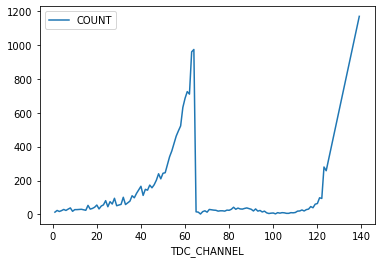

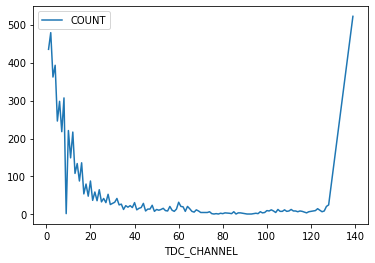

In [8]:
fpga_0 = data[data['FPGA']== 0].groupby('TDC_CHANNEL').size()
fpga_0_with_counts = fpga_0.reset_index(name='COUNT')
fpga_0_with_counts.plot(x = 'TDC_CHANNEL', y = 'COUNT', legend = True)

fpga_1 = data[data['FPGA']== 1].groupby('TDC_CHANNEL').size()
fpga_1_with_counts = fpga_1.reset_index(name='COUNT')
fpga_1_with_counts.plot(x = 'TDC_CHANNEL', y = 'COUNT', legend = True)